# Rod Sheet Dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from tyssue import config
from tyssue import Sheet, SheetGeometry as geom
from tyssue.dynamics import SheetModel as model
from tyssue.solvers.sheet_vertex_solver import Solver

from tyssue.io import hdf5
from tyssue.draw.threejs_draw import view_3js
from tyssue.draw.plt_draw import quick_edge_draw
%matplotlib inline

from tyssue.utils.utils import _to_2d, _to_3d

In [12]:
dsets = hdf5.load_datasets('../data/hf5/ellipsoid_sheet.hf5',
                           data_names=['vert', 'edge', 'face'])

sheet = Sheet('rod', dsets,
              config.geometry.rod_sheet())
geom.update_all(sheet)

print(sheet.settings)
sheet.update_specs(config.dynamics.quasistatic_sheet_spec())

sheet.specs['face']['prefered_area'] = 2.
sheet.specs['face']['prefered_height'] = 0.5

sheet.specs['vert']['prefered_height'] = 0.5
sheet.specs['vert']['basal_shift'] = 0.1

sheet.specs['face']['prefered_vol'] = 1.0

sheet.specs


{'height_axis': 'z', 'geometry': 'rod', 'ab': [1.1250404860129168, 0.77774788397141592]}


{'edge': {'dx': 0.0,
  'dy': 0.0,
  'dz': 0.0,
  'face': 0,
  'length': 0.0,
  'line_tension': 0.12,
  'nx': 0.0,
  'ny': 0.0,
  'nz': 1.0,
  'srce': 0,
  'trgt': 0},
 'face': {'area': 1.0,
  'contractility': 0.04,
  'is_alive': True,
  'num_sides': 6,
  'perimeter': 1.0,
  'prefered_area': 2.0,
  'prefered_height': 0.5,
  'prefered_vol': 1.0,
  'vol_elasticity': 1.0,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0},
 'settings': {'ab': [1.1250404860129168, 0.77774788397141592],
  'geometry': 'rod',
  'grad_norm_factor': 1.0,
  'height_axis': 'z',
  'nrj_norm_factor': 1.0},
 'vert': {'basal_shift': 0.1,
  'height': 0.0,
  'is_active': True,
  'left_tip': False,
  'prefered_height': 0.5,
  'radial_tension': 0.0,
  'rho': 0.0,
  'right_tip': False,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0}}

In [13]:
sheet.vert_df.rho.mean(), sheet.vert_df.basal_shift.mean()

(0.7895479495559642, 4.0)

In [14]:
rdr, lines = view_3js(sheet)
rdr

In [19]:
def scaled_unscaled(func, scale, eptm, geom,
                    model, args, kwargs, coords=None):
    """
    Scales the epithelium by an homotetic factor `scale`, computes
    the energy, and scales back to input scale
    """
    if coords is None:
        coords = eptm.coords
    geom.scale(eptm, scale, coords)
    geom.update_all(eptm)
    res = func(*args, **kwargs)
    geom.scale(eptm, 1/scale, coords)
    geom.update_all(eptm)
    return res





```python
from tyssue.dynamics.sheet_isotropic_model import (
    isotropic_relax, isotropic_energies)

isotropic_relax(
    sheet, 
    config.dynamics.quasistatic_sheet_spec(),
    geom)
```

In [20]:

sheet.specs

{'edge': {'dx': 0.0,
  'dy': 0.0,
  'dz': 0.0,
  'face': 0,
  'length': 0.0,
  'line_tension': 0.12,
  'nx': 0.0,
  'ny': 0.0,
  'nz': 1.0,
  'srce': 0,
  'trgt': 0},
 'face': {'area': 1.0,
  'contractility': 0.04,
  'is_alive': True,
  'num_sides': 6,
  'perimeter': 1.0,
  'prefered_area': 2.0,
  'prefered_height': 0.5,
  'prefered_vol': 1.0,
  'vol_elasticity': 1.0,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0},
 'settings': {'ab': [1.1250404860129168, 0.77774788397141592],
  'geometry': 'rod',
  'grad_norm_factor': 1.0,
  'height_axis': 'z',
  'nrj_norm_factor': 1.0},
 'vert': {'basal_shift': 0.1,
  'height': 0.0,
  'is_active': True,
  'left_tip': False,
  'prefered_height': 0.5,
  'radial_tension': 0.0,
  'rho': 0.0,
  'right_tip': False,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0}}

In [21]:
sheet.face_df.area.mean(),   sheet.vert_df['rho'].mean(),

(0.22686480589764224, 0.7895479495559642)

In [23]:
model.compute_energy(sheet)

21.374575340622023

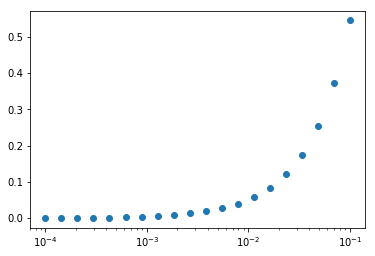

In [26]:
fig, ax = plt.subplots()
scales = np.logspace(-4, -1, 20)

def total_volume(sheet):
    return sheet.face_df.vol.sum()

volumes =  np.array([
    scaled_unscaled(total_volume, s,
    sheet, geom, model,
    args=[sheet], kwargs={})
    for s in scales])

energies =  np.array([scaled_unscaled(
    model.compute_energy, s, sheet,
    geom, model, args=[sheet], kwargs={})
    for s in scales])



ax.plot(scales, energies, 'o')
ax.set_xscale('log')
#ax.set_yscale('log')


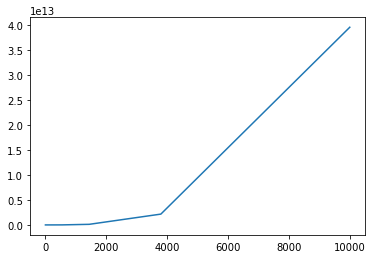

In [69]:
fig, ax = plt.subplots()
ax.plot(scales, volumes)

In [61]:
E_t, E_c, E_v = model.compute_energy(sheet, full_output=True)

In [62]:
E_c

face
0     0.134849
1     0.188756
2     0.195085
3     0.192685
4     0.186617
5     0.137602
6     0.195715
7     0.194526
8     0.194208
9     0.135269
10    0.186196
11    0.203265
12    0.201716
13    0.195572
14    0.186107
15    0.188883
16    0.197161
17    0.198696
18    0.194376
19    0.136661
20    0.141590
21    0.194279
22    0.193037
23    0.194764
24    0.187207
25    0.190003
26    0.196605
27    0.193860
28    0.194629
29    0.136954
30    0.134404
31    0.200141
32    0.197617
33    0.195442
34    0.186567
35    0.226228
36    0.194844
37    0.199914
38    0.194120
39    0.136723
40    0.120084
41    0.128394
42    0.125080
43    0.127919
44    0.182240
45    0.130386
46    0.170773
47    0.180486
dtype: float64

In [6]:
for e in energies:
    print(e.mean())

NameError: name 'energies' is not defined

In [ ]:
e

In [ ]:
def bruteforce_isotropic_relax(ellipsoid_sheet):
    pass